Nbr columns:  61
X.shape (207, 60)
Y.shape (207, 2)

-------------------------
93 Original Class: 1
94 Original Class: 0
95 Original Class: 0
96 Original Class: 1
97 Original Class: 0
98 Original Class: 1
99 Original Class: 0
100 Original Class: 0
-------------------------

train_x.shape (165, 60)
train_y.shape (165, 2)
test_x.shape (42, 60)
test_y.shape (42, 2)
n_dim 60

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

epoch:  0  -  cost:  142.11516  - MSE:  17246.249795363023 - Train Accuracy:  0.45454547
epoch:  1  -  cost:  2.6028323  - MSE:  14.866646336017421 - Train Accuracy:  0.54545456
epoch:  2  -  cost:  0.79969096  - MSE:  6.633727215006119 - Train Accuracy:  0.47272727
epoch:  3  -  cost:  0.8255253  - MSE:  2.307449186349807 - Train Accuracy:  0.54545456
epoch:  4  -  cost:  0.6937223  - MSE:  3.922639253907584 - Train Accuracy:  0

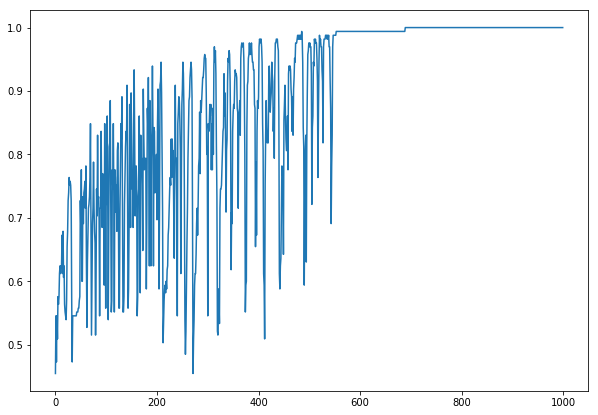

Test Accuracy:  [[ -1.0346926   -1.5107167 ]
 [ -6.5465236    0.6725533 ]
 [ -5.161524    -4.149523  ]
 [ -9.293722    -0.32814574]
 [ -4.331777     0.35115445]
 [ -1.2930682   -4.059319  ]
 [ -7.2528033    0.65170383]
 [ -6.51343     -4.0050945 ]
 [ -1.0317271   -3.6138172 ]
 [ -1.8833948   -4.7230487 ]
 [ -4.9372344   -5.828094  ]
 [ -6.8271894   -0.5082326 ]
 [  0.6695045   -3.3254204 ]
 [  0.3806041   -6.5325127 ]
 [  4.4876575  -16.743496  ]
 [ -9.597019    -4.106164  ]
 [  0.5451829   -1.0762794 ]
 [ -7.7283072    1.2170895 ]
 [  1.918052    -5.5864086 ]
 [ -2.6802583   -6.243245  ]
 [ -4.443316    -3.9620066 ]
 [-11.132093    -0.22481549]
 [  0.3124023   -6.510935  ]
 [  1.648627    -6.202274  ]
 [  3.037953    -9.172585  ]
 [ -5.5155287   -2.4524264 ]
 [  1.5857893   -3.9913101 ]
 [ -9.775725    -1.2751207 ]
 [  0.46746826  -1.0720234 ]
 [-11.250775    -0.44196105]
 [ -3.1279857   -9.662349  ]
 [  1.5655501   -4.7132607 ]
 [  2.8273668  -12.333103  ]
 [  1.4331979   -4.1409044 

In [1]:
# Code from the tutorial TensorFlow Tutorial | Deep Learning Using TensorFlow | Edureka
# Mine vs Rock
# https://www.youtube.com/watch?v=yX8KuPZCAMo
# With small corrections and additions of missing parts by Claude COULOMBE - PhD candidate TÉLUQ / UQAM - Montréal

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Reading the dataset
# Get the dataset "sonar.csv" at 
# https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data
# Just save the file as sonar.csv
def read_dataset(file_name):
    dir_path = "/Users/claudecoulombe/git/tensorflow_basic_tutorial/"
    df = pd.read_csv(dir_path+file_name,delimiter=',')
    print("Nbr columns: ",len(df.columns))
    X = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    # Encode the dependant variable
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print("X.shape",X.shape)
    print("Y.shape",Y.shape)
    return (X,Y)
 
# Define the encoder function M => 1, R => 0
def one_hot_encode(labels):
    n_labels = len(labels)
#     n_unique_labels = len(np.unique(labels))
    n_unique_labels = 2
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels] = 1
    return one_hot_encode
 
# Read the dataset
X, Y = read_dataset("sonar.csv")

# Shuffle the dataset to mix up the rows
X, Y = shuffle(X, Y, random_state=1)
 
# Convert the dataset into train and test datasets
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

print()
print("-"*25)
for i in range(93,101):
    print(i,"Original Class:",int(Y[i][1]))
print("-"*25)
print()

# Inspect the shape of the train and test datasets
print("train_x.shape",train_x.shape)
print("train_y.shape",train_y.shape)
print("test_x.shape",test_x.shape)
print("test_y.shape",test_y.shape)
 
# Define the hyperparameters
learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)
# Number of features <=> number of columns
n_dim = X.shape[1] 
print("n_dim",n_dim)
print()

n_class = 2
model_path = "/Users/claudecoulombe/git/tensorflow_basic_tutorial/model/"
 
# Define the number of hidden layers an the
# number of neurons for each layer
n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60
 
# Inputs and outputs
x = tf.placeholder(tf.float32,[None, n_dim])
y_ = tf.placeholder(tf.float32,[None, n_class])
  
# Model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activations
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with sigmoid activations
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # Hidden layer with sigmoid activations
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    # Hidden layer with RELU activations
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # Output layer with linear activations
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out_b']
    return out_layer
 
# define the weights and the biases for each layer
 
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1]),name="h1"),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2]),name="h2"),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3]),name="h3"),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4]),name="h4"),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]),name="out"),
    }
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1]),name="b1"),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2]),name="b2"),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3]),name="b3"),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4]),name="b4"),
    'out_b': tf.Variable(tf.truncated_normal([n_class]),name="out_b"),
    }
 
# Initialization
init = tf.global_variables_initializer()
 
saver = tf.train.Saver()
 
# Call your model defined
y = multilayer_perceptron(x, weights, biases)
 
# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

# Launch the graph
sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

# Calculate the cost and the accuracy for each epoch
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_:train_y})
    cost = sess.run(cost_function,feed_dict={x:train_x, y_:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#     print("Accuracy: ", (sess.run(accuracy, feed_dict={x:test_x, y_:test_y})))
    pred_y = sess.run(y,feed_dict={x:test_x} )
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    accuracy = (sess.run(accuracy,feed_dict={x:train_x, y_:train_y}))
    accuracy_history.append(accuracy)
    print('epoch: ', epoch,' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)
    
save_path = saver.save(sess,model_path+"model.ckpt")
print("Model saved in file: %s", save_path)

# Plot MSE and accuracy graph
plt.figure(figsize=(10,7))
plt.plot(accuracy_history)
plt.show()

# Print the final mean square error
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.square(pred_y - test_y))
print("Test Accuracy: ", (sess.run(y, feed_dict={x:test_x, y_:test_y} )))

# Print the final mean square error
pred_y = sess.run(y, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y- test_y))
print("MSE: %.4f" % sess.run(mse))

#--------------

In [2]:
prediction = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("**************************************************************")
print("* 1 stands for M, (i.e. Mine) and 0 stands for R (i.e. Rock) *")
print("**************************************************************")
for i in range(93,101):
    prediction_run = sess.run(prediction, feed_dict={x:X[i].reshape(1,60)})
    accuracy_run = sess.run(accuracy, feed_dict={x:X[i].reshape(1,60), y_:Y[i].reshape(1,2)})
    print(i,"Original Class: ", int(sess.run(y_[i][1],feed_dict={y_:Y})), " Predicted Values: ", prediction_run[0] )
    print("Accuracy: ",str(accuracy_run*100)+"%")

**************************************************************
* 1 stands for M, (i.e. Mine) and 0 stands for R (i.e. Rock) *
**************************************************************
93 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
94 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
95 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
96 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
97 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
98 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
99 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
100 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
